# Tugas Besar Probabilitas dan Statistika IF2220

Steven Gianmarg Haposan Siahaan-13520145

Ken Kalang Alqayubi-13520010

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from scipy.stats import normaltest
from scipy.stats import ttest_1samp
from scipy import stats
from scipy.stats import norm
from statsmodels.stats import weightstats as stests
from statsmodels.stats.proportion import proportions_ztest
#read file
path=r"water_potability.csv"
df = pd.read_csv(path,names=["id", "pH", "Hardness", "Solids", "Chloramines", "Sulfate", "Conductivity", "OrganicCarbon", "Trihalomethanes", "Turbidity", "Potability"])

# Mendapatkan jumlah baris dan kolom pada data
baris,kolom = df.shape
#Menampilkan data
#print(df)


# Nomor 1
Menulis deskripsi statistika (Descriptive Statistics) dari semua kolom pada data yang bersifat 
numerik, terdiri dari mean, median, modus, standar deviasi, variansi, range, nilai minimum,
maksimum, kuartil, IQR, skewness dan kurtosis. Boleh juga ditambahkan deskripsi lain.

# Seluruh deskripsi kecuali modus

In [64]:
deskripsi = df.describe()
deskripsiadd = deskripsi.append(df.median(), ignore_index=True)
deskripsiadd = deskripsiadd.append(df.var(), ignore_index=True)
deskripsiadd = deskripsiadd.append(df.max()-df.min(), ignore_index=True)
deskripsiadd = deskripsiadd.append(df.quantile(0.75)-df.quantile(0.25), ignore_index=True)
deskripsiadd = deskripsiadd.append(df.skew(), ignore_index=True)
deskripsiadd = deskripsiadd.append(df.kurt(), ignore_index=True)
deskripsiadd.index = ['count','mean','std','min','25%','50%','75%','max','median','variance','range','IQR','skewness','kurtosis']
deskripsiadd

,id,pH,Hardness,Solids,Chloramines,Sulfate,Conductivity,OrganicCarbon,Trihalomethanes,Turbidity,Potability
count,2010.00000,2010.000000,2010.000000,2.010000e+03,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000
mean,1005.50000,7.087193,195.969209,2.190467e+04,7.134322,333.211376,426.476708,14.357940,66.400717,3.969497,0.402985
std,580.38134,1.572803,32.643166,8.625398e+03,1.585214,41.211111,80.701872,3.325770,16.081109,0.780471,0.490620
min,1.00000,0.227499,73.492234,3.209426e+02,1.390871,129.000000,201.619737,2.200000,8.577013,1.450000,0.000000
25%,503.25000,6.090785,176.740657,1.561441e+04,6.138326,307.626986,366.619219,12.122530,55.949993,3.442882,0.000000
50%,1005.50000,7.029490,197.203525,2.092688e+04,7.142014,332.214113,423.438372,14.323286,66.482041,3.967374,0.000000
75%,1507.75000,8.053006,216.447589,2.717053e+04,8.109933,359.268147,482.209772,16.683562,77.294613,4.514663,1.000000
max,2010.00000,14.000000,317.338124,5.648867e+04,13.127000,481.030642,753.342620,27.006707,124.000000,6.494749,1.000000
median,1005.50000,7.029490,197.203525,2.092688e+04,7.142014,332.214113,423.438372,14.323286,66.482041,3.967374,0.000000
variance,336842.50000,2.473709,1065.576277,7.439749e+07,2.512904,1698.355672,6512.792113,11.060746,258.602066,0.609135,0.240708


# Deskripsi Modus

In [65]:
for i in df.columns:
  mod = df[i].mode()
  print("Modus " + i + ": ", end="")
  if(len(mod) != 2010): #jika tidak semua modus
    for j in range(len(mod)):
      if j != len(mod) -1:
        print(mod[j], end= ", ")
      else:
        print(mod[j])
  else:
    print("Semua data muncul sekali") #semua data unik, semua modus
  print()

Modus id: Semua data muncul sekali

Modus pH: Semua data muncul sekali

Modus Hardness: Semua data muncul sekali

Modus Solids: Semua data muncul sekali

Modus Chloramines: Semua data muncul sekali

Modus Sulfate: Semua data muncul sekali

Modus Conductivity: Semua data muncul sekali

Modus OrganicCarbon: Semua data muncul sekali

Modus Trihalomethanes: Semua data muncul sekali

Modus Turbidity: Semua data muncul sekali

Modus Potability: 0



# Notes
Tabel di bawah menampilkan modus dari data untuk setiap kolom. 
Terdapat 3 kemungkinan modus :
1. Terdapat lebih dari 1 data yang memiliki nilai kemunculan sama,sehingga modus lebih dari 1
2. Terdapat kolom yang seluruh datanyanya merupakan data unik,sehingga seluruh datanya ditampilkan(Pada tabel dibawah akan ditampilkan 20 data)
3. Hanya ada 1 nilai modus
Pada tabel ini terdapat nilai NaN,karena tabel "memaksakan" untuk memunculkan 10 baris, padahal ada beberapa kolom yang data modusnya tidak mencapai 10.

In [66]:
df.mode().head(20)

,id,pH,Hardness,Solids,Chloramines,Sulfate,Conductivity,OrganicCarbon,Trihalomethanes,Turbidity,Potability
0,1,0.227499,73.492234,320.942611,1.390871,129.000000,201.619737,2.200000,8.577013,1.450000,0.0
1,2,0.989912,77.459586,1198.943699,1.920271,180.206746,210.319182,4.371899,14.343161,1.492207,NaN
2,3,1.431782,81.710895,1351.906979,2.397985,182.397370,233.907965,4.466772,15.684877,1.496101,NaN
3,4,1.757037,94.091307,1372.091043,2.456014,187.170714,245.859632,4.861631,16.291505,1.680554,NaN
4,5,1.985383,94.812545,2552.962804,2.458609,187.424131,252.968328,4.966862,17.527765,1.812529,NaN
5,6,2.128531,94.908977,3413.081633,2.484380,192.033592,254.392306,5.159380,17.915723,1.844372,NaN
6,7,2.376768,97.280909,3640.734320,2.498597,203.444521,254.393276,5.188466,18.015272,1.872573,NaN
7,8,2.538116,98.452931,4111.785432,2.621268,205.935091,257.007718,5.196717,19.175175,1.910117,NaN
8,9,2.558103,98.771644,4168.196994,2.648390,206.247229,257.704179,5.218233,22.219327,1.917754,NaN
9,10,2.569244,100.457615,4304.492483,2.654491,207.890482,258.880209,5.315287,23.136611,1.961475,NaN


# Nomor 2
Membuat Visualisasi plot distribusi, dalam bentuk histogram dan boxplot untuk setiap
kolom numerik. Berikan uraian penjelasan kondisi setiap kolom berdasarkan kedua plot
tersebut.

In [68]:
def nomor2(nama):
    df1=df[nama]
    print("Histogram :")
    df1.plot(kind='hist',edgecolor='black', color='skyblue', title="Histogram "+nama, grid=True)
    plt.show()
    print("Boxplot :")
    df.boxplot(column=nama)
    plt.show()

Histogram :


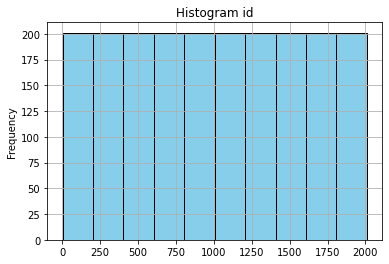

Boxplot :


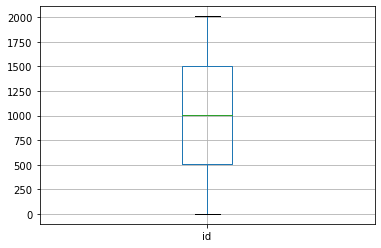

In [69]:
nomor2('id')

# Penjelasan
Berdasarkan histogram dan boxplot dari data ID diatas,dapat disimpulkan bahwa data id tidak memiliki outliers.Pada distribusi datanya juga dapat dilihat bahwa data ID memiliki persebaran yang merata. Sehingga dapat dikatakan sebagai No Skew atau Normal.

Histogram :


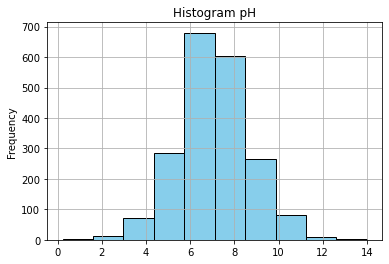

Boxplot :


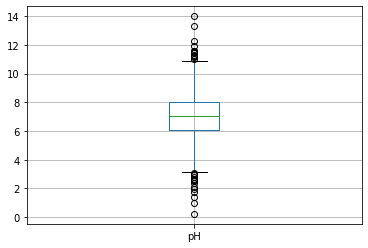

In [70]:
nomor2('pH')

# Penjelasan
Berdasarkan histogram dan boxplot dari data pH diatas, dapat disimpulkan bahwa data pH memiliki banyak outliers dibawah nilai minimum dan juga banyak outliers diatas nilai maksimum . Selain itu pada distribusi datanya, dapat dilihat bahwa data pH memiliki lebih banyak nilai yang lebih rendah. Sehingga dapat dikatakan sebagai Positively Skewed.

Histogram :


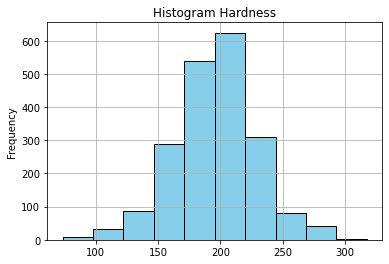

Boxplot :


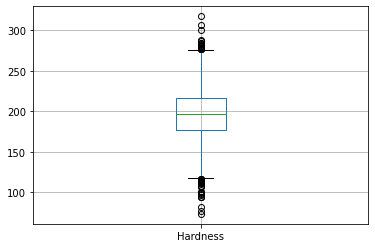

In [88]:
nomor2('Hardness')

# Penjelasan
Berdasarkan histogram dan boxplot dari data Hardness diatas, dapat disimpulkan bahwa data Hardness memiliki banyak outliers dibawah nilai minimum dan juga banyak outliers diatas nilai maksimum . Selain itu pada distribusi datanya, dapat dilihat bahwa data Hardness memiliki lebih banyak nilai yang lebih tinggi. Sehingga dapat dikatakan sebagai Negatively Skewed.

Histogram :


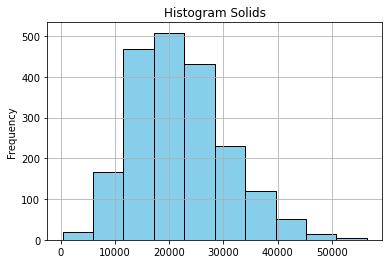

Boxplot :


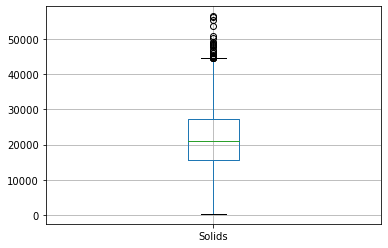

In [89]:
nomor2("Solids")

# Penjelasan
Berdasarkan histogram dan boxplot dari data Solids diatas, dapat disimpulkan bahwa data Solids memiliki banyak outliers diatas nilai maksimum . Selain itu pada distribusi datanya, dapat dilihat bahwa data Solids memiliki lebih banyak nilai yang lebih rendah secara signifikan. Sehingga dapat dikatakan sebagai Positively Skewed.

Histogram :


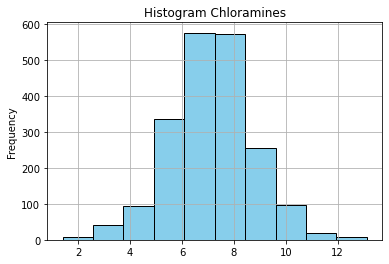

Boxplot :


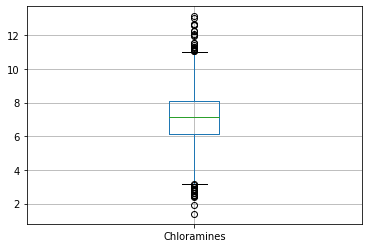

In [90]:
nomor2("Chloramines")

# Penjelasan
Berdasarkan histogram dan boxplot dari data Chloramines diatas, dapat disimpulkan bahwa data Chloramines memiliki banyak outliers dibawah nilai minimum dan juga banyak outliers diatas nilai maksimum. Selain itu pada distribusi datanya, dapat dilihat bahwa data Chloramines memiliki lebih banyak nilai yang lebih rendah walaupun tidak terlalu signifikan. Sehingga dapat dikatakan sebagai Positively Skewed.

Histogram :


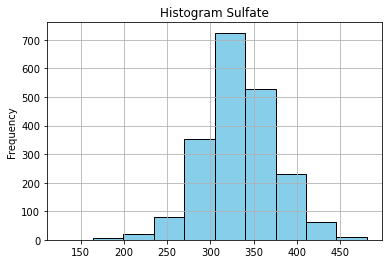

Boxplot :


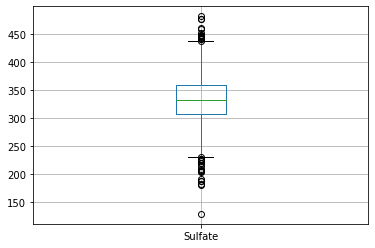

In [91]:
nomor2("Sulfate")

# Penjelasan
Berdasarkan histogram dan boxplot dari data Sulfate diatas, dapat disimpulkan bahwa data Sulfate memiliki banyak outliers dibawah nilai minimum dan juga banyak outliers diatas nilai maksimum. Selain itu pada distribusi datanya, dapat dilihat bahwa data Sulfate memiliki lebih banyak nilai yang lebih tinggi secara signifikan. Sehingga dapat dikatakan sebagai Negatively Skewed.

Histogram :


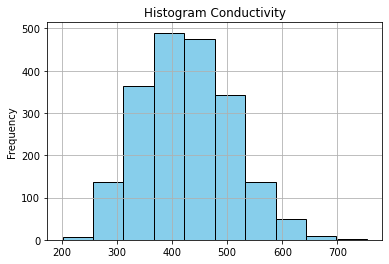

Boxplot :


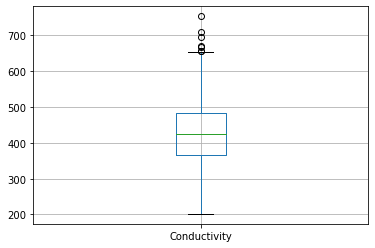

In [74]:
nomor2("Conductivity")

# Penjelasan
Berdasarkan histogram dan boxplot dari data Conductivity diatas, dapat disimpulkan bahwa data Conductivity memiliki banyak outliers diatas nilai maksimum. Selain itu pada distribusi datanya, dapat dilihat bahwa data Conductivity memiliki lebih banyak nilai yang lebih rendah secara signifikan. Sehingga dapat dikatakan sebagai Positively Skewed.

Histogram :


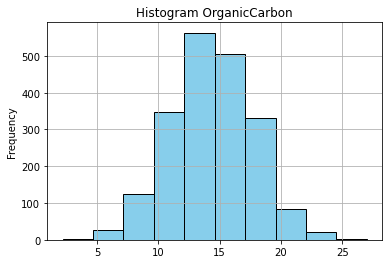

Boxplot :


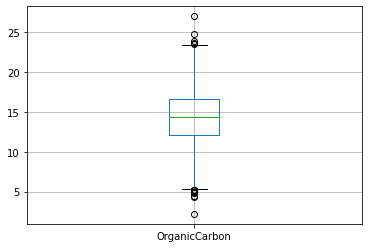

In [92]:
nomor2("OrganicCarbon")

# Penjelasan
Berdasarkan histogram dan boxplot dari data OrganicCarbon diatas, dapat disimpulkan bahwa data OrganicCarbon memiliki banyak outliers dibawah nilai minimum dan juga banyak outliers diatas nilai maksimum. Selain itu pada distribusi datanya, dapat dilihat bahwa data OrganicCarbon memiliki lebih banyak nilai yang lebih rendah walaupun tidak terlalu terlihat secara signifikan. Sehingga dapat dikatakan sebagai Positively Skewed.

Histogram :


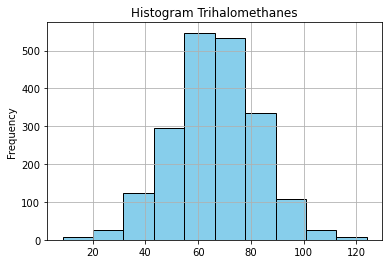

Boxplot :


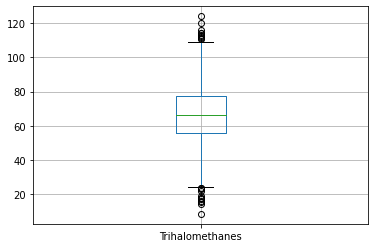

In [93]:
nomor2("Trihalomethanes")

# Penjelasan
Berdasarkan histogram dan boxplot dari data Trihalomethanes diatas, dapat disimpulkan bahwa data Trihalomethanes memiliki banyak outliers dibawah nilai minimum dan juga banyak outliers diatas nilai maksimum. Selain itu pada distribusi datanya, dapat dilihat bahwa data Trihalomethanes memiliki lebih banyak nilai yang lebih tinggi walaupun tidak terlalu terlihat secara signifikan. Sehingga dapat dikatakan sebagai Negatively Skewed.

Histogram :


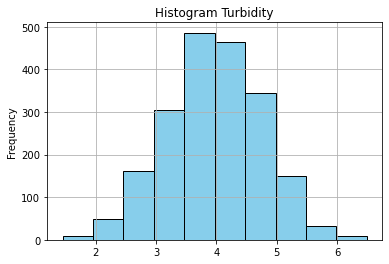

Boxplot :


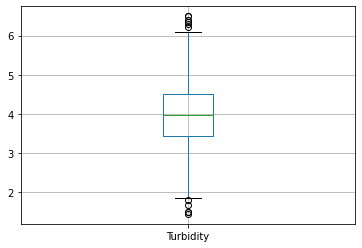

In [94]:
nomor2("Turbidity")

# Penjelasan
Berdasarkan histogram dan boxplot dari data Turbidity diatas, dapat disimpulkan bahwa data Turbidity memiliki banyak outliers dibawah nilai minimum dan juga banyak outliers diatas nilai maksimum. Selain itu pada distribusi datanya, dapat dilihat bahwa data Turbidity memiliki persebaran yang cenderung merata sehingga dapat dikatakan sebagai No Skewed / Normal.

Histogram :


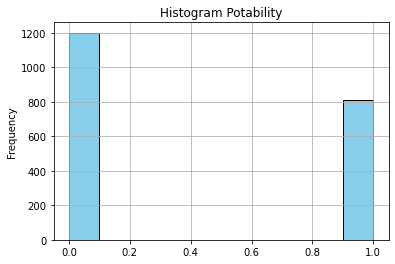

Boxplot :


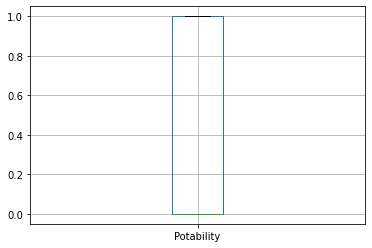

In [81]:
nomor2("Potability")

# Penjelasan
Berdasarkan histogram dan boxplot dari data Potability diatas, dapat disimpulkan bahwa data Potability tidak memiliki outlier. Selain itu pada distribusi datanya, dapat dilihat bahwa data Potability memiliki lebih banyak nilai yang lebih rendah. Sehingga dapat dikatakan sebagai Positively Skewed.

# Nomor 3
Menentukan setiap kolom numerik berdistribusi normal atau tidak. Gunakan normality test
yang dikaitkan dengan histogram plot.

In [2]:
def normality_test(nama):
    sns.displot(df[nama])
    statistic, p_val = stats.normaltest(df[nama])
    print("Nilai P : "+str(p_val))
    alpha = 0.05
    # jika p-value > alpha, maka distribusi normal
    print("Kolom "+nama,end=' ')
    if p_val > alpha:
        print("berdistribusi normal(p > 0.05).")
    else:
        print("tidak berdistribusi normal(p < 0.05).")

Nilai P : 0.0
Kolom id tidak berdistribusi normal(p < 0.05).


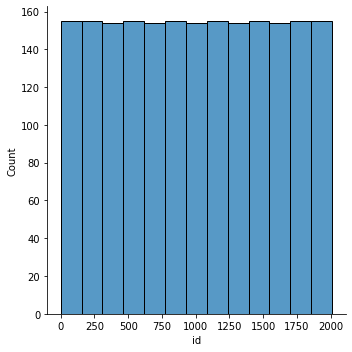

In [3]:
normality_test('id')

# Penjelasan
Puncak yang "lebar" menandakan nilai kurtosis yang kecil. Kolom ID tidak berdistribusi normal.

Nilai P : 2.6514813346797777e-05
Kolom pH tidak berdistribusi normal(p < 0.05).


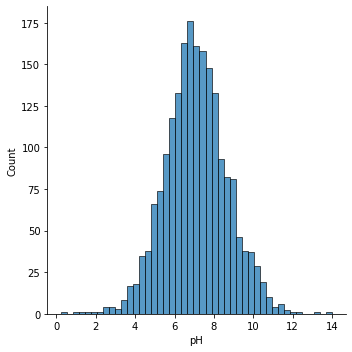

In [4]:
normality_test('pH')

# Penjelasan 
Nilai skewness sangat kecil, oleh karena itu terlihat bahwa kurva seperti simetris.Kolom pH tidak berdistribusi normal.

Nilai P : 0.00013442428699593753
Kolom Hardness tidak berdistribusi normal(p < 0.05).


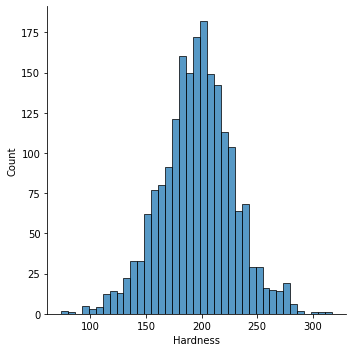

In [5]:
normality_test('Hardness')

# Penjelasan
Nilai skewness sangat kecil, oleh karena itu terlihat bahwa kurva seperti simetris.Kolom Hardness tidak berdistribusi normal

Nilai P : 2.0796613688739523e-24
Kolom Solids tidak berdistribusi normal(p < 0.05).


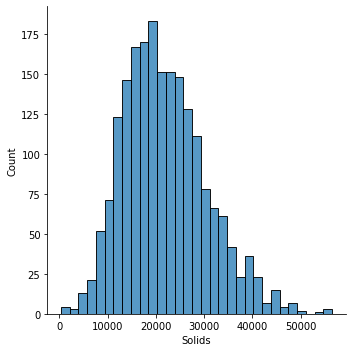

In [6]:
normality_test('Solids')

# Penjelasan
Histogram cenderung bersifat positive skewness.Kolom Solids  tidak berdistribusi normal.

Nilai P : 0.0002504831654753917
Kolom Chloramines tidak berdistribusi normal(p < 0.05).


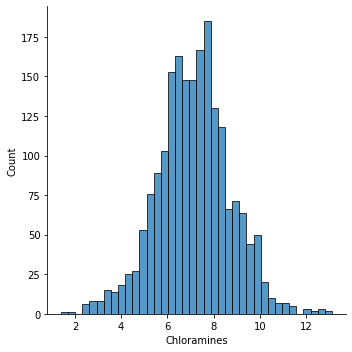

In [7]:
normality_test('Chloramines')

# Penjelasan
Histogram cenderung bersifat positive skewness.Kolom Chloramines tidak berdistribusi normal.

Nilai P : 4.4255936678013136e-07
Kolom Sulfate tidak berdistribusi normal(p < 0.05).


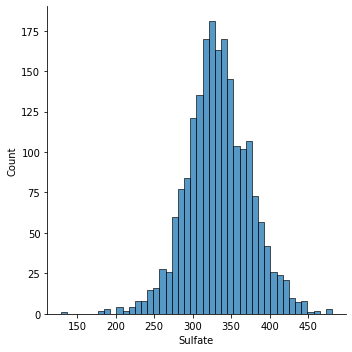

In [8]:
normality_test('Sulfate')

# Penjelasan
Histogram cenderung bersifat negative skewness. Kurtosis cenderung positif (kurva terlihat kurus). Kolom Sulfate tidak berdistribusi normal.

Nilai P : 4.39018078287845e-07
Kolom Conductivity tidak berdistribusi normal(p < 0.05).


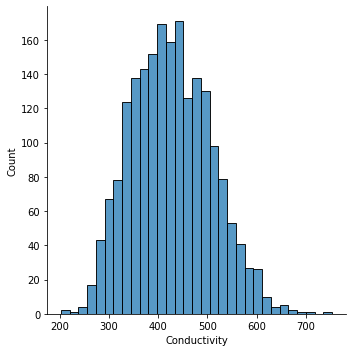

In [9]:
normality_test('Conductivity')

# Penjelasan
Histogram cenderung bersifat positive skewness. Kurtosis cenderung negatif (kurva terlihat lebar). Kolom Conductivity tidak berdistribusi normal.

Nilai P : 0.8825496581408284
Kolom OrganicCarbon berdistribusi normal(p > 0.05).


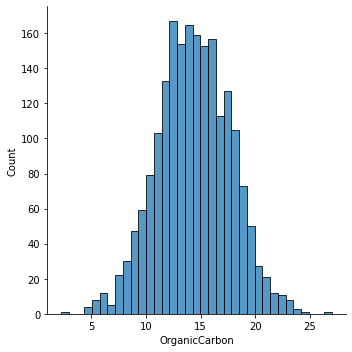

In [10]:
normality_test('OrganicCarbon')

# Penjelasan
Nilai skewness sangat kecil, oleh karena itu terlihat bahwa kurva seperti simetris.Kolom OrganicCarbon berdistribusi normal.

Nilai P : 0.1043598441875204
Kolom Trihalomethanes berdistribusi normal(p > 0.05).


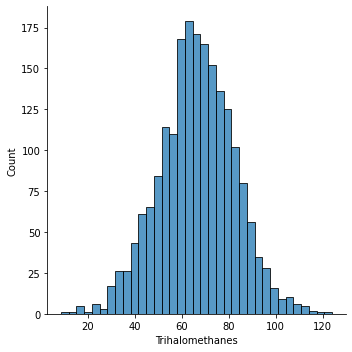

In [11]:
normality_test('Trihalomethanes')

# Penjelasan
Nilai skewness sangat kecil, oleh karena itu terlihat bahwa kurva seperti simetris. Nilai kurtosis tidak terlalu menyimbang (terlalu "kurus" atau terlalu "gendut"). Kolom Trihalomethanes berdistribusi normal.

Nilai P : 0.7694717369961169
Kolom Turbidity berdistribusi normal(p > 0.05).


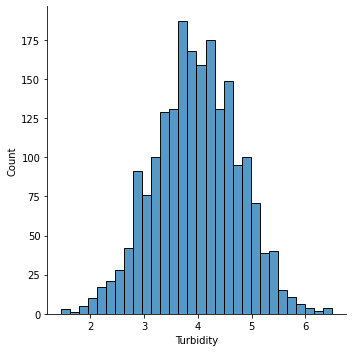

In [12]:
normality_test('Turbidity')

# Penjelasan
Nilai skewness sangat kecil, oleh karena itu terlihat bahwa kurva seperti simetris.Kurtosis bernilai negatif terlihat dari kurva yang relatif gendut. Kolom Turbidity berdistribusi normal.

Nilai P : 0.0
Kolom Potability tidak berdistribusi normal(p < 0.05).


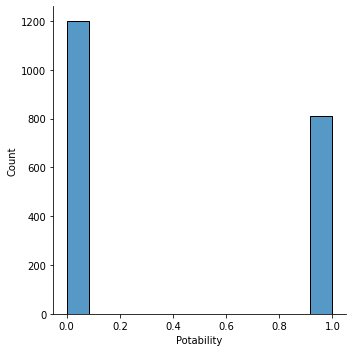

In [13]:
normality_test('Potability')

# Penjelasan
Terdapat dua puncak dengan tinggi yang berbeda. Tidak ada kecenderungan skewness. Namun, bentuk kurva tidak menyerupai bentuk bel, sehingga kolom Potability tidak berdistribusi normal.

#Terdapat 3 kolom yang memenuhi normality test, yaitu kolom OrganicCarbon,Trihalomethanes dan Turbidity. Namun, apabila ditinjau dari visualisasi plot distribusi, hanya kolom OrganicCarbon dan Turbidity yang membentuk atau menyerupai bel.

# Nomor 4
Melakukan test hipotesis 1 sampel, dengan menuliskan 6 langkah testing dan menampilkan
juga boxplotnya untuk kolom/bagian yang bersesuaian.

1. Nilai Rata-rata pH di atas 7?
2. Nilai Rata-rata Hardness tidak sama dengan 205?
3. Nilai Rata-rata 100 baris pertama kolom Solids bukan 21900?
4. Proporsi nilai Conductivity yang lebih dari 450, adalah tidak sama dengan 10%?
5. Proporsi nilai Trihalomethanes yang kurang dari 40, adalah kurang dari 5%?

# 4.a. Nilai Rata-rata pH di atas 7?

Nilai uji statistik : 2.485445147379887
Nilai P : 0.006509872359240925
Berdasarkan uji hipotesis menggunakan P-value,
maka hipotesis nol H0 DITOLAK


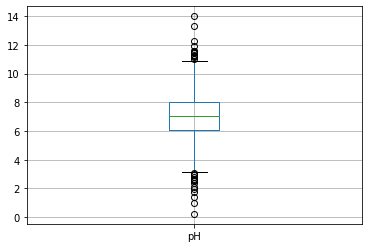

In [44]:
# nomor 4a
# Sampel yang diambil adalah seluruh populasinya.
# a. Nilai Rata-Rata pH di atas 7?
df1 = df["pH"]
# 1. Tentukan Hipotesis Nol, H0 : mean = 7
# 2. Tentukan Hipotesis Alternatif, H1 : mean > 7
# 3. Tentukan tingkat signifikansi alfa
alfa = 0.05
# 4. Tentukan uji statistik yang sesuai dan tentukan daerah kritis
# Daerah kritis hipotesis alternatif ada di sebelah kanan nilai kritis
# uji T test dan mencari p_value
# 5. Hitung nilai uji statistik dari data sample. Hitung p-value sesuai dengan uji statistik yang digunakan.
stat, p_value = stats.ttest_1samp(df1, 7)
# Karena ttest_1samp secara default merupakan two-sided, maka p_value dibagi 2
p_value /= 2
print("Nilai uji statistik :",stat)
print("Nilai P :",p_value)
# 6. Ambil keputusan tolak atau terima, berdasarkan p-value
print("Berdasarkan uji hipotesis menggunakan P-value,\nmaka hipotesis nol H0",end=' ')
if (p_value < alfa):
  print("DITOLAK")
else:
  print("TIDAK DITOLAK")

df.boxplot(column="pH")
plt.show()

# Penjelasan

H0 ditolak karena nilai p-value lebih kecil dibandingkan significance level alpha.
Dapat disimpulkan bahwa H0 DITOLAK dan H1 diterima.

# 4.b. Nilai Rata-rata Hardness tidak sama dengan 205?

   α =  0.05
   Didapatkan daerah kritis z > 1.959963984540054 atau z < -1.959963984540054
   Digunakan uji statistik z
   p value =  2.5128904895144654e-35
   z value =  -12.403137170010732
6. Ambil keputusan apakah H0 ditolak atau tidak
   H0 ditolak karena nilai ztest berada pada daerah kritis
   H0 ditolak karena p value lebih kecil dari nilai signifikan
Boxplot:


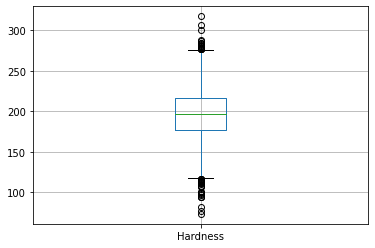

In [45]:
# nomor 4b
# Sampel yang diambil adalah seluruh populasinya.
#b. Nilai Rata-rata Hardness tidak sama dengan 205?
#("Enam langkah testing:")
#("1. Tentukan hipotesis nol atau H0")
#("   H0: μ = 116")
#("2. Tentukan hipotesis alternatif atau H1")
#("   H1: μ != 116")
#("3. Tentukan tingkat signifikan α")
alfa = 0.05
print("   α = ", alfa)
#4. Tentukan uji statistik yang sesuai dan tentukan daerah kritis")
daerahKritis = stats.norm.ppf(1-(alfa/2))
print("   Didapatkan daerah kritis z > "+str(daerahKritis)+" atau z < -"+str(daerahKritis))
print("   Digunakan uji statistik z")
#print("5. Hitung uji nilai statistik dari data sample")
ztest ,pval = stests.ztest(df["Hardness"], x2=None, value=205)
print("   p value = ", float(pval))
print("   z value = ", ztest)
print("6. Ambil keputusan apakah H0 ditolak atau tidak")
if (ztest > daerahKritis or ztest < -daerahKritis):
    print("   H0 ditolak karena nilai ztest berada pada daerah kritis")
else:
    print("   H0 diterima karena nilai ztest tidak berada pada daerah kritis")
if (pval < 0.05):
    print("   H0 ditolak karena p value lebih kecil dari nilai signifikan")
else:
    print("   H0 diterima karena p value lebih besar dari nilai signifikan")
print("Boxplot:")
%matplotlib inline
boxplot = df.boxplot(column=["Hardness"])

# Penjelasan

1. H0 ditolak karena nilai ztest berada pada daerah kritis
2. H0 ditolak karena p value lebih kecil dari nilai signifikan

Dapat disimpulkan bahwa H0 DITOLAK sedangkan H1 TIDAK DITOLAK

Rata-rata (x_bar)           = 22347.3344
Standar deviasi (S)         = 7896.1882
Daerah kritis R (t_alpha)   = 1.9842
Nilai uji statistik (t)     = 0.563680
Nilai p-value               = 0.5742467134052605

H0 TIDAK DITOLAK karena nilai uji terletak di luar daerah kritis
H0 TIDAK DITOLAK karena p-value lebih besar dibanding significance level alpha

Disimpulkan bahwa H0 TIDAK DITOLAK dan H1 DITOLAK


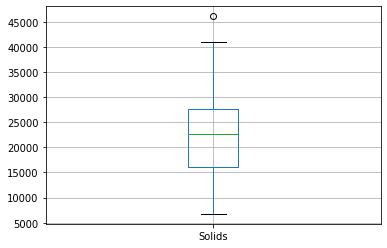

In [9]:
#c. Nilai Rata-rata 100 baris pertama kolom Solids bukan 21900?
# Nilai statistik
mu = 21900
n = 100
sample = df.head(n)
x_bar = sample['Solids'].mean()
std = sample['Solids'].std(ddof=0)
alpha = 0.05

# Daerah kritis
# Daerah kritis, t < -t_alpha/2 atau t_alpha > t/2
v = n - 1
t_alpha = stats.t.ppf(1-alpha/2,v)

# Nilai uji statistik dan p-value
t, p_value = stats.ttest_1samp(sample['Solids'], mu)


print("Rata-rata (x_bar)           = %.4f" %(x_bar))
print("Standar deviasi (S)         = %.4f" %(std))
print("Daerah kritis R (t_alpha)   = %.4f" %(t_alpha))
print("Nilai uji statistik (t)     = %f" %(t))
print("Nilai p-value               = " + str(p_value))
print("")
sample.boxplot("Solids")

reject = False
# REJECT H0 jika nilai uji terletak di daerah kritis (disebelah kanan nilai kritis)
if (t < -t_alpha or t > t_alpha):
    reject = True
    print("H0 DITOLAK karena nilai uji terletak di daerah kritis")
else : 
    print("H0 TIDAK DITOLAK karena nilai uji terletak di luar daerah kritis")
# REJECT H0 jika p-value lebih kecil dibanding tingkat signifikansi alpha
if (p_value < alpha):
    reject = True
    print("H0 DITOLAK ")
else : 
    print("H0 TIDAK DITOLAK ")



# Penjelasan

1. H0 TIDAK DITOLAK karena nilai uji terletak di luar daerah kritis
2. H0 TIDAK DITOLAK karena p-value lebih besar dibanding significance level alpha

Maka dari data di atas H0 TIDAK DITOLAK sedangkan H1 DITOLAK


# Pengambilan Keputusan
Dapat disimpulkan bahwa pernyataan "Nilai Rata-rata 100 baris pertama kolom Solids bukan 21900" adalah tidak benar.

# 5.d. Proporsi nilai Conductivity yang lebih dari 450, adalah tidak sama dengan 10%?

Jumlah data (x)             = 745
Proportion (p0)             = 0.10
Daerah kritis R (z_alpha)   = 1.96
Nilai uji statistik (z)     = 40.446376
Nilai p-value               = 0.0

H0 REJECTED karena p-value lebih kecil dibandingkan significance level alpha

Disimpulkan bahwa H0 REJECTED dan H1 NOT REJECTED


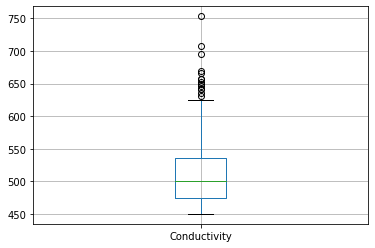

In [11]:
#d. Proporsi nilai Conductivity yang lebih dari 450, adalah tidak sama dengan 10%?
# Nilai statistik
n = df.shape[0] #500
x = df.loc[df["Conductivity"] > 450].count()["Conductivity"]
p0 = 0.10
alpha = 0.05

# Daerah kritis
z_alpha = stats.norm.ppf(1-alpha/2)

# Nilai uji
z = (x-n*p0)/math.sqrt(n*p0*(1-p0))
#print("Nilai uji : ",z)

# P-value
p_value = 2*(stats.norm.sf(z))
#print("P-value   : ", p_value)

## Data statistik no_d
# Jumlah data (x)             = 97
# Proportion (p0)             = 0.15
# Daerah kritis R (z_alpha)   = 1.96
# Nilai uji statistik (z)     = 2.755387
# Nilai p-value               = 0.0058622771684096655

# Print
print("Jumlah data (x)             = %d" %(x))
print("Proportion (p0)             = %.2f" %(p0))
print("Daerah kritis R (z_alpha)   = %.2f" %(z_alpha))
print("Nilai uji statistik (z)     = %f" %(z))
print("Nilai p-value               = " + str(p_value))
print("")
df.loc[df["Conductivity"] > 450].boxplot("Conductivity")

# Pengambilan keputusan 
reject = False
if (p_value <= alpha):
    reject = True
    print("H0 DITOLAK karena p-value lebih kecil dibandingkan significance level alpha")
else : 
    print("H0 TIDAK DITOLAK karena p-value lebih besar dibanding significance level alpha")

print("")
if (reject):
    print ("Disimpulkan bahwa H0 DITOLAK dan H1 TIDAK DITOLAK")
else : 
    print ("Disimpulkan bahwa H0 TIDAK DITOLAK dan H1 DITOLAK")

# Penjelasan

1. H0 DITOLAK karena p-value lebih kecil dibanding significance level alpha

Maka dari data di atas H0 DITOLAK sedangkan H1 TIDAK DITOLAK

# Pengambilan Keputusan
Dapat disimpulkan bahwa pernyataan "Proporsi nilai Conductivity yang lebih dari 450, adalah tidak sama dengan 10%" adalah tidak benar.

# 4.e. Proporsi nilai Trihalomethanes yang kurang dari 40, adalah kurang dari 5%?

Jumlah data (x)             = 106
Proportion (p0)             = 0.05
Nilai kritis (z_alpha)      = -1.6449
Nilai uji statistik (z)     = 0.562883
Nilai p-value               = 0.7132425995092373

H0 TIDAK DITOLAK


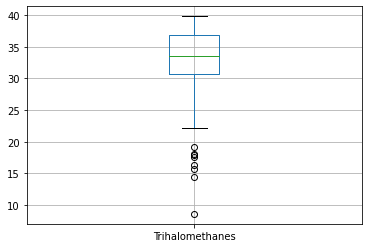

In [20]:
n = df.shape[0]
x = df.loc[df["Trihalomethanes"] < 40].count()["Trihalomethanes"]
p0 = 0.05
alpha = 0.05

# Daerah kritis
z_alpha = -stats.norm.ppf(1-alpha)
#print("Nilai kritis : ", z_alpha)
#print("Daerah kritis : z < %.4f" %(z_alpha))

# Nilai uji
z = (x-n*p0)/math.sqrt(n*p0*(1-p0))
#print("Nilai uji : ",z)

# P-value
p_value = (stats.norm.cdf(z))
#print("P-value   : ", p_value)

## Data statistik no_e
#Jumlah data (x)             = 0
#Proportion (p0)             = 0.05
#Nilai kritis (z_alpha)      = -1.6449
#Nilai uji statistik (z)     = -5.129892
#Nilai p-value               = 1.4495441414387716e-07

# Print
print("Jumlah data (x)             = %d" %(x))
print("Proportion (p0)             = %.2f" %(p0))
print("Nilai kritis (z_alpha)      = %.4f" %(z_alpha))
print("Nilai uji statistik (z)     = %f" %(z))
#print("Nilai p-value               = %f" %(p_value))
print("Nilai p-value               = " + str(p_value))
print("")
df.loc[df["Trihalomethanes"] < 40].boxplot("Trihalomethanes")

# Pengambilan keputusan 
reject = False
if (p_value <= alpha):
    reject = True
    print("H0 DITOLAK")
else : 
    print("H0 TIDAK DITOLAK")

# Penjelasan

1. H0 TIDAK DITOLAK karena p-value lebih besar dibanding significance level alpha

Maka dari data di atas H0 TIDAK DITOLAK sedangkan H1 DITOLAK


# Pengambilan Keputusan
Dapat disimpulkan bahwa pernyataan "Proporsi nilai Trihalomethanes yang kurang dari 40, adalah kurang dari 5%" adalah benar.

# Nomor 5

Melakukan test hipotesis 2 sampel, dengan menuliskan 6 langkah testing dan menampilkan juga boxplotnya untuk kolom/bagian yang bersesuaian

1. Data kolom Sulfate dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata kedua bagian tersebut sama?
2. Data kolom OrganicCarbon dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata bagian awal lebih besar dari pada bagian akhir sebesar 0.15?
3. Rata-rata 100 baris pertama kolom Chloramines sama dengan 100 baris terakhirnya?
4. Proporsi nilai bagian awal Turbidity yang lebih dari 4, adalah lebih besar daripada, proporsi nilai yang sama di bagian akhir Turbidity ?
5. Bagian awal kolom Sulfate memiliki variansi yang sama dengan bagian akhirnya?

# 5.a. Data kolom Sulfate dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata kedua bagian tersebut sama?

Plot data awal Sulfate:


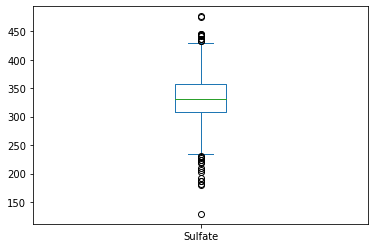

Plot data akhir Sulfate:


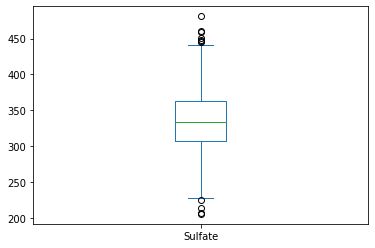

Nilai uji statistik:  -2.1177172044750745
P value:  0.034444306652381386
Daerah kritis diantara  -1.646372735186523  dan  1.6463727351865223

Kesimpulan:
H0 ditolak


In [14]:
#nomor 5
"""
Melakukan test hipotesis 2 sampel, dengan menuliskan 6 langkah testing dan menampilkan
juga boxplotnya untuk kolom/bagian yang bersesuaian.
a. Data kolom Sulfate dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah
rata-rata kedua bagian tersebut sama?
"""
alpha = 0.05

# data bagian awal
df1 = df['Sulfate'][:1005]
# data bagian akhir
df2 = df['Sulfate'][1005:]

# plot data
print('Plot data awal Sulfate:')
df1.plot.box()
plt.show()
print('Plot data akhir Sulfate:')
df2.plot.box()
plt.show()

# uji statistik (t test)
tstat, pval = stats.ttest_rel(df1, df2)
print('Nilai uji statistik: ', tstat)

# P value
print('P value: ', pval)

# Daerah kritis
x = stats.t.ppf(alpha, len(df1)-1)
y = stats.t.ppf(1-alpha, len(df2)-1)
print('Daerah kritis diantara ', x, ' dan ', y)

# Kesimpulan
print('\nKesimpulan:')
if (alpha > pval):
    print('H0 ditolak')
else:
    print('H0 tidak ditolak')

# Penjelasan

H0 ditolak karena nilai p-value lebih kecil dari tingkta signifikansinya

# Pengambilan Keputusan

Maka dapat disimpulkan bahwa rata-rata bagian awal Sulfate tidak sama dengan bagian akhir sulfate.

# 5.b. Data kolom OrganicCarbon dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata bagian awal lebih besar dari pada bagian akhir sebesar 0.15?

Plot data awal OrganicCarbon:


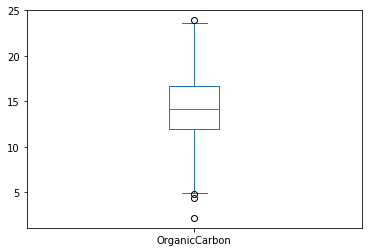

Plot data akhir OrganicCarbon:


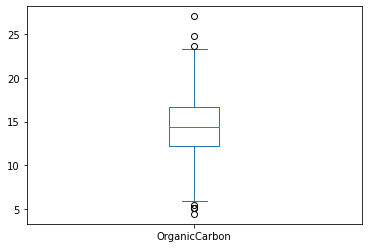

Nilai uji statistik:  -2.413145517798807
P value:  0.01581550381760006
Daerah kritis pada z > z(0.05) atau z < -z(0.05)

Kesimpulan:
H0 ditolak


In [15]:
"""
b. Data kolom OrganicCarbon dibagi 2 sama rata: bagian awal dan bagian akhir kolom.
Benarkah rata-rata bagian awal lebih besar dari pada bagian akhir sebesar 0.15?
"""
alpha = 0.05

# data bagian awal
df1 = df['OrganicCarbon'][:1005]
# data bagian akhir
df2 = df['OrganicCarbon'][1005:]

# plot data
print('Plot data awal OrganicCarbon:')
df1.plot.box()
plt.show()
print('Plot data akhir OrganicCarbon:')
df2.plot.box()
plt.show()

# uji statistik (test z)
ztest, pval = stests.ztest(df1, x2=df2, value=0.15, alternative='two-sided')
print('Nilai uji statistik: ', ztest)

# P value
print('P value: ', pval)

# Daerah kritis
print('Daerah kritis pada z > z(0.05) atau z < -z(0.05)')

# Kesimpulan
print('\nKesimpulan:')
if (pval < alpha):
    print('H0 ditolak')
else:
    print('H0 tidak ditolak')



# Penjelasan

H0 ditolak karena nilai p-value lebih kecil dari tingkat signifikansinya

# Pengambilan Keputusan

Maka dapat disimpulkan bahwa rata-rata bagian awal OrganicCarbon tidak lebih besar dari bagian akhir yaitu 0.15.

# 5.c. Rata-rata 100 baris pertama kolom Chloramines sama dengan 100 baris terakhirnya?

Plot data awal Chloramines:


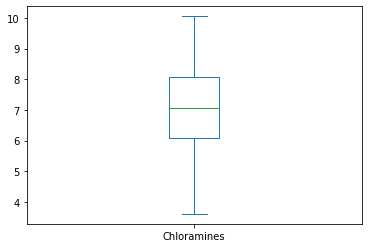

Plot data akhir Chloramines:


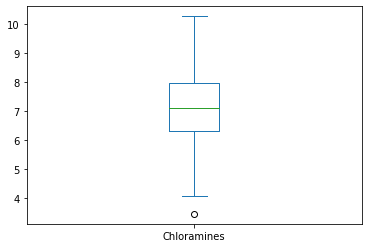

Nilai uji statistik:  -0.6683369073842939
P value:  0.5054738364553271
Daerah kritis diantara  -1.6603911559963902  dan  1.6603911559963895

Kesimpulan:
H0 tidak ditolak


In [16]:
"""
c. Rata-rata 100 baris pertama kolom Chloramines sama dengan 100 baris terakhirnya?
"""
alpha = 0.05

# data bagian awal
df1 = df['Chloramines'][:100]
# data bagian akhir
df2 = df['Chloramines'][1910:2010]

# plot data
print('Plot data awal Chloramines:')
df1.plot.box()
plt.show()
print('Plot data akhir Chloramines:')
df2.plot.box()
plt.show()

# uji statistik (t test)
tstat, pval = stats.ttest_rel(df1, df2)
print('Nilai uji statistik: ', tstat)

# P value
print('P value: ', pval)

# Daerah kritis
x = stats.t.ppf(alpha, len(df1)-1)
y = stats.t.ppf(1-alpha, len(df2)-1)
print('Daerah kritis diantara ', x, ' dan ', y)

# Kesimpulan
print('\nKesimpulan:')
if (alpha > pval):
    print('H0 ditolak')
else:
    print('H0 tidak ditolak')

# Penjelasan

1. H0 tidak ditolak karena nilai p-value lebih besar dari tingkat signifikansinya.
2. H0 ditolak karena z berada di dalam batasan daerah kritis.

# Pengambilan Keputusan

Maka dapat disimpulkan bahwa Rata-rata 100 baris pertama Chloramines != Rata-rata 100 baris terakhir Chloramines

# 5.d. Proporsi nilai bagian awal Turbidity yang lebih dari 4 adalah lebih besar daripada proporsi nilai yang sama di bagian akhir Turbidity ?

Plot data awal Turbidity:


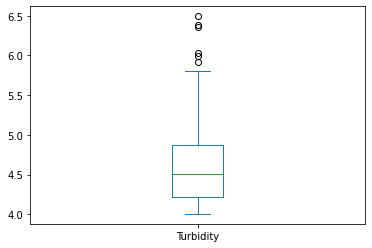

Plot data akhir Turbidity:


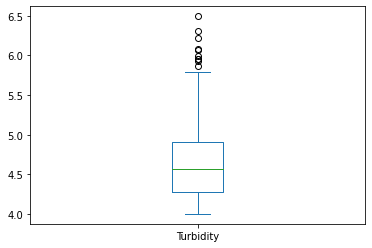

Nilai uji statistik:  -0.13388958661778735
Daerah kritis terletak pada z >  1.6448536269514722

Kesimpulan:
H0 tidak ditolak


In [17]:
"""
d. Proporsi nilai bagian awal Turbidity yang lebih dari 4, adalah lebih besar daripada,
proporsi nilai yang sama di bagian akhir Turbidity ?
"""


# nilai tingkat signifikan
alpha = 0.05

# data bagian awal
bagatas = df['Turbidity'][:1005][df['Turbidity'] > 4]
# data bagian akhir
bagbawah = df['Turbidity'][1005:][df['Turbidity'] > 4]

# plot data
print('Plot data awal Turbidity:')
bagatas.plot.box()
plt.show()
print('Plot data akhir Turbidity:')
bagbawah.plot.box()
plt.show()

# jumlah data awal dan akhir Turbidity
nr1 = 1005
nr2 = 1005

# uji statistik (test z)
p1 = len(bagatas)/nr1
p2 = len(bagbawah)/nr2
p = (len(bagatas) + len(bagbawah))/(nr1+nr2)
q = 1-p

z = (p1-p2)/math.sqrt(p*q*(1/nr1 + 1/nr2))

print('Nilai uji statistik: ', z)

# Daerah kritis
zkritis = stats.norm.ppf(1-alpha)
print('Daerah kritis terletak pada z > ', zkritis)

# Kesimpulan
print('\nKesimpulan:')
if (z > zkritis):
    print('H0 ditolak')
else:
    print('H0 tidak ditolak')


# Penjelasan

H0 tidak ditolak karena nilai z berada di luar batasan daerah kritis.


# Pengambilan Keputusan
Maka dapat disimpulkan bahwa proporsi bagian awal Turbidity yang lebih dari 4 adalah sama dibanding dengan bagian akhir .

Plot data awal Sulfate:


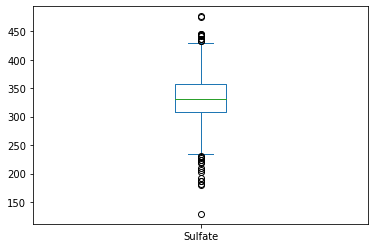

Plot data akhir Sulfate:


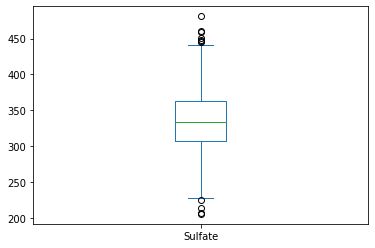

Variance data awal Sulfate:  1708.3966020772502
Variance data akhir Sulfate:  1682.7330644425087
Nilai uji statistik:  1.0152511043950063
P value:  0.40526664801745826
f memiliki daerah kritis pada f >  1.1317692392568777  dan f <  0.883572344355818

Kesimpulan:
H0 tidak ditolak


In [37]:
"""
e. Bagian awal kolom Sulfate memiliki variansi yang sama dengan bagian akhirnya?
"""

# H0 = var1 = var2
# H1 = var1 != var2

# nilai tingkat signifikan
alpha = 0.05

# Data bagian awal
df1 = df['Sulfate'][:1005]
# Data bagian akhir
df2 = df['Sulfate'][1005:]

# Plot data
print('Plot data awal Sulfate:')
df1.plot.box()
plt.show()
print('Plot data akhir Sulfate:')
df2.plot.box()
plt.show()

# degrees of freedom
dfn = len(df1)-1
dfd = len(df2)-1

# Variance dari data awal dan akhir
var1 = df1.var(ddof=1)
var2 = df2.var(ddof=1)
print('Variance data awal Sulfate: ', var1)
print('Variance data akhir Sulfate: ', var2)

# Uji statistik (test f)
f = var1/var2
print('Nilai uji statistik: ', f)

# P Value
f_pval = 1-stats.f.cdf(f, dfn, dfd)
print('P value: ', f_pval)

# Daerah kritis
fkritis1 = stats.f(dfn, dfd).ppf(1-alpha/2)
fkritis2 = stats.f(dfn, dfd).ppf(alpha/2)
print('f memiliki daerah kritis pada f > ', fkritis1, ' dan f < ', fkritis2)

# Kesimpulan
print('\nKesimpulan:')
if (f > fkritis1 or f < fkritis2):
    print('H0 ditolak')
else:
    print('H0 tidak ditolak')

# Penjelasan

1. H0 Tidak ditolak karena nilai f berada di luar batasan daerah kritis

Maka H0 NOT REJECTED dan H1 REJECTED

# Pengambilan Keputusan

Dapat disimpulkan bahwa bagian awal kolom Sulfate memiliki variansi yang sama dengan bagian akhirnya

# Nomor 6
Test korelasi: tentukan apakah setiap kolom non-target berkorelasi dengan kolom target,
dengan menggambarkan juga scatter plot nya. Gunakan correlation test.


Misalkan cor adalah Pearson Correlation Coefficient

cor selalu berada pada interval -1<=cor<=1  , dan dibagi menjadi 3 kategori :
1. 0<cor<=1 dikegorikan sebagai positive correlation
2. -1<=cor<0 dikegorikan sebagai negative correlation
3. cor=0 dikegorikan sebagai no correlation

Klasifikasi dari strength of correlation :
1. Perfect relationship, |r|=1
2. Very strong relationship,0.7<=|r|<1
3. strong relationship,0.4<=|r|<0.7
4. moderate relationship,0.3<=|r|<0.4
5. weak relationship, 0.1<=|r|<0.3
6. no or negligible relationship,0.0<=|r|<0.1

In [113]:
#nomor 6
#Test korelasi: tentukan apakah setiap kolom non-target berkorelasi dengan kolom target,
#dengan menggambarkan juga scatter plot nya. Gunakan correlation test
def nomor6(nama):
    df.plot(kind='scatter', x=nama, y="Potability", color="blue")
    plt.show()
    df1 = df[nama]
    cor = df1.corr(method='pearson', other=df["Potability"])
    print("Koefisien Korelasi Pearson dari "+nama+" : "+str(cor))
    print("Korelasi antara kolom "+nama+" dan kolom Potability adalah",end=' ')
    if 0 < cor < 1:
        if (0.7<=abs(cor)<1) :
            print("Very Strong Positive Relationship")
        if 0.4<=abs(cor)<0.7:
            print("Strong Positive Relationship")
        if 0.3<=abs(cor)<0.4:
            print("Moderate Positive Relationship")
        if 0.1<=abs(cor)<0.3:
            print("Weak Positive Relationship")
        if 0.0<=abs(cor)<0.1:
            print("No or Negligible Positive Relationship")
    elif -1 < cor < 0:
        if (0.7<=abs(cor)<1) :
            print("Very Strong Negative Relationship")
        if 0.4<=abs(cor)<0.7:
            print("Strong Negative Relationship")
        if 0.3<=abs(cor)<0.4:
            print("Moderate Negative Relationship")
        if 0.1<=abs(cor)<0.3:
            print("Weak Negative Relationship")
        if 0.0<=abs(cor)<0.1:
            print("No or Negligible Negative Relationship")        
    elif cor == 1:
        print("perfect positive correlation.")
    elif cor == -1:
        print("perfect negative correlation.")
    elif cor == 0:
        print("tidak memiliki correlation.")
    else: # cor diluar -1 <= cor <= 1
        print("error.")



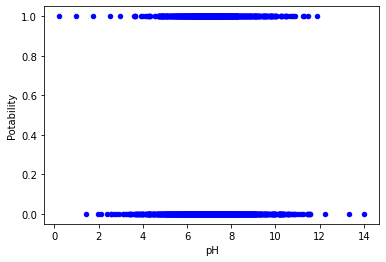

Koefisien Korelasi Pearson dari pH : 0.015475094408433483
Korelasi antara kolom pH dan kolom Potability adalah No or Negligible Positive Relationship


In [114]:
nomor6('pH')

Klasifikasi dari strength of correlation :
1. Perfect relationship, |r|=1
2. Very strong relationship,0.7<=|r|<1
3. strong relationship,0.4<=|r|<0.7
4. moderate relationship,0.3<=|r|<0.4
5. weak relationship, 0.1<=|r|<0.3
6. no or negligible relationship,0.0<=|r|<0.1

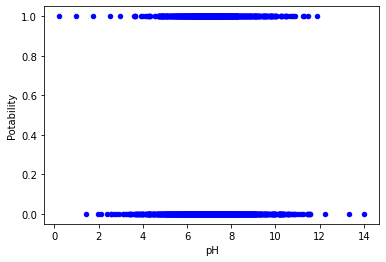

Koefisien Korelasi Pearson dari pH : 0.015475094408433483
Korelasi antara kolom pH dan kolom Potability adalah positive correlation.


In [108]:
nomor6('pH')

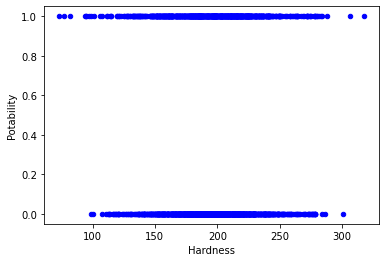

Koefisien Korelasi Pearson dari Hardness : -0.0014631528959479338
Korelasi antara kolom Hardness dan kolom Potability adalah No or Negligible Negative Relationship


In [115]:
nomor6("Hardness")

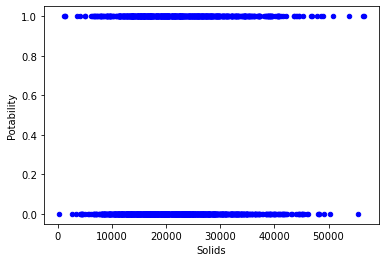

Koefisien Korelasi Pearson dari Solids : 0.03897657818173472
Korelasi antara kolom Solids dan kolom Potability adalah No or Negligible Positive Relationship


In [116]:
nomor6("Solids")

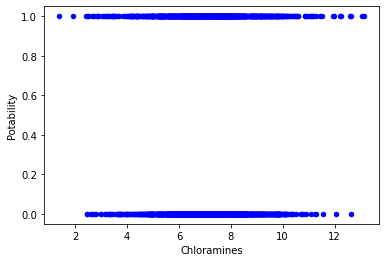

Koefisien Korelasi Pearson dari Chloramines : 0.02077892184052408
Korelasi antara kolom Chloramines dan kolom Potability adalah No or Negligible Positive Relationship


In [117]:
nomor6("Chloramines")

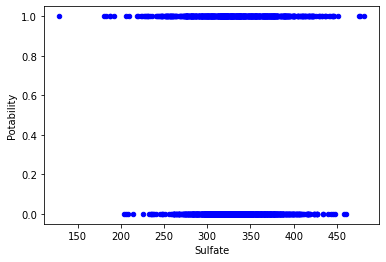

Koefisien Korelasi Pearson dari Sulfate : -0.015703164419273833
Korelasi antara kolom Sulfate dan kolom Potability adalah No or Negligible Negative Relationship


In [118]:
nomor6("Sulfate")

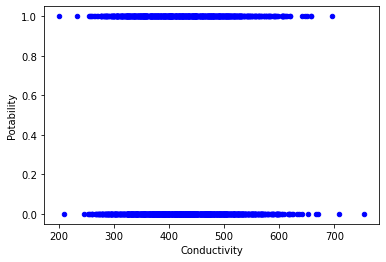

Koefisien Korelasi Pearson dari Conductivity : -0.016257120111377088
Korelasi antara kolom Conductivity dan kolom Potability adalah No or Negligible Negative Relationship


In [119]:
nomor6("Conductivity")

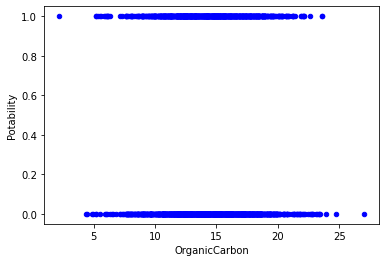

Koefisien Korelasi Pearson dari OrganicCarbon : -0.015488461910747283
Korelasi antara kolom OrganicCarbon dan kolom Potability adalah No or Negligible Negative Relationship


In [120]:
nomor6( "OrganicCarbon")

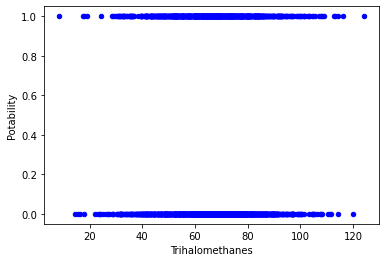

Koefisien Korelasi Pearson dari Trihalomethanes : 0.009236711064713018
Korelasi antara kolom Trihalomethanes dan kolom Potability adalah No or Negligible Positive Relationship


In [122]:
nomor6("Trihalomethanes")

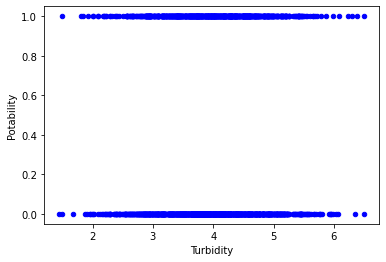

Koefisien Korelasi Pearson dari Turbidity : 0.022331042640622672
Korelasi antara kolom Turbidity dan kolom Potability adalah No or Negligible Positive Relationship


In [123]:
nomor6("Turbidity")